<a href="https://colab.research.google.com/github/mateuspadua/MachineLearningIGTI/blob/master/desafio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando dataset
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [2]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Carregando nosso dataset em um dataframe
df = pd.read_csv("winequality-red.csv",sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Análise Exploratório de Dados**

In [9]:
#Verificando a forma do nosso dataset
print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}".format(df.shape[1]))

Entradas: 1599
Variáveis: 12


In [10]:
#Analisando o tipo dos dados
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
# Quantos tipos diferentes de dados existem no dataset do desafio?
len(df.dtypes.value_counts())

2

In [17]:
#Verificando a soma dos valores nulos por variável
df.isnull().sum().sort_values(ascending = False)

quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total sulfur dioxide    0
free sulfur dioxide     0
chlorides               0
residual sugar          0
citric acid             0
volatile acidity        0
fixed acidity           0
dtype: int64

In [18]:
#Analisando a descrição estatística do nosso dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
#Desvio padrão da variável "residual sugar"
print("Qual é o desvio padrão para a variável 'fixed acidity' ? é {:.4f}".format(df['fixed acidity'].std()))
#Media da variável "residual sugar"
print("Qual é a mediana para a variável 'residual sugar'? {}".format(df['residual sugar'].median()))

Qual é o desvio padrão para a variável 'fixed acidity' ? é 1.7411
Qual é a mediana para a variável 'residual sugar'? 2.2


In [22]:
#Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH"
df[['fixed acidity','pH']].corr()

,fixed acidity,pH
fixed acidity,1.000000,-0.682978
pH,-0.682978,1.000000


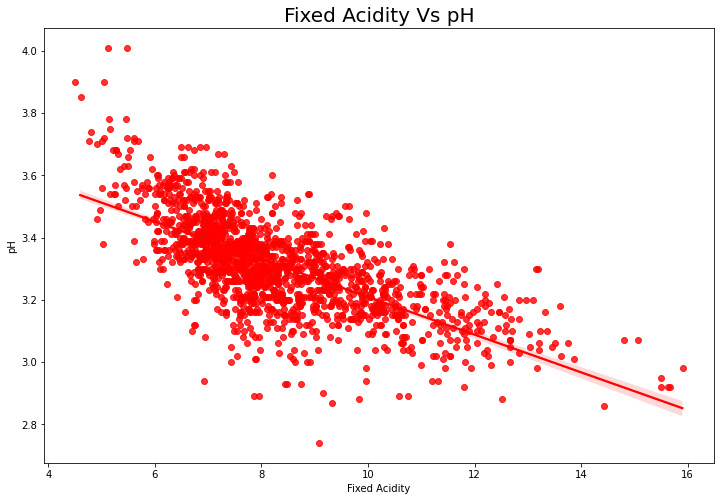

In [24]:
plt.figure(figsize=(12,8))
sns.regplot(x = 'fixed acidity', y ='pH', data = df, color = 'r', x_jitter=0.2)
plt.xlabel("Fixed Acidity")
plt.ylabel("pH")
plt.title("Fixed Acidity Vs pH", fontsize = 20)
plt.show()

In [25]:
#coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol"
df[['quality','alcohol']].corr()

,quality,alcohol
quality,1.000000,0.476166
alcohol,0.476166,1.000000


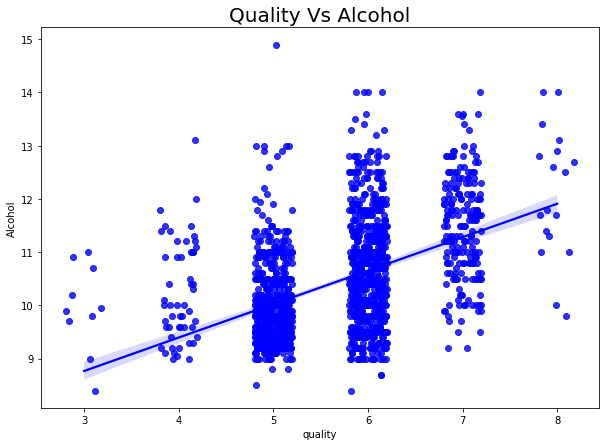

In [26]:
plt.figure(figsize = (10,7))
sns.regplot(x = 'quality', y = 'alcohol', data = df, x_jitter=0.2, color = 'b')
plt.xlabel("quality")
plt.ylabel("Alcohol")
plt.title("Quality Vs Alcohol", fontsize = 20)
plt.show()

In [27]:
#Verificando as instâncias da nossa variável target
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [28]:
#Quantidade de instâncias cuja qualidade do vinha é igual a 5
len(df[df['quality'] == 5])

681

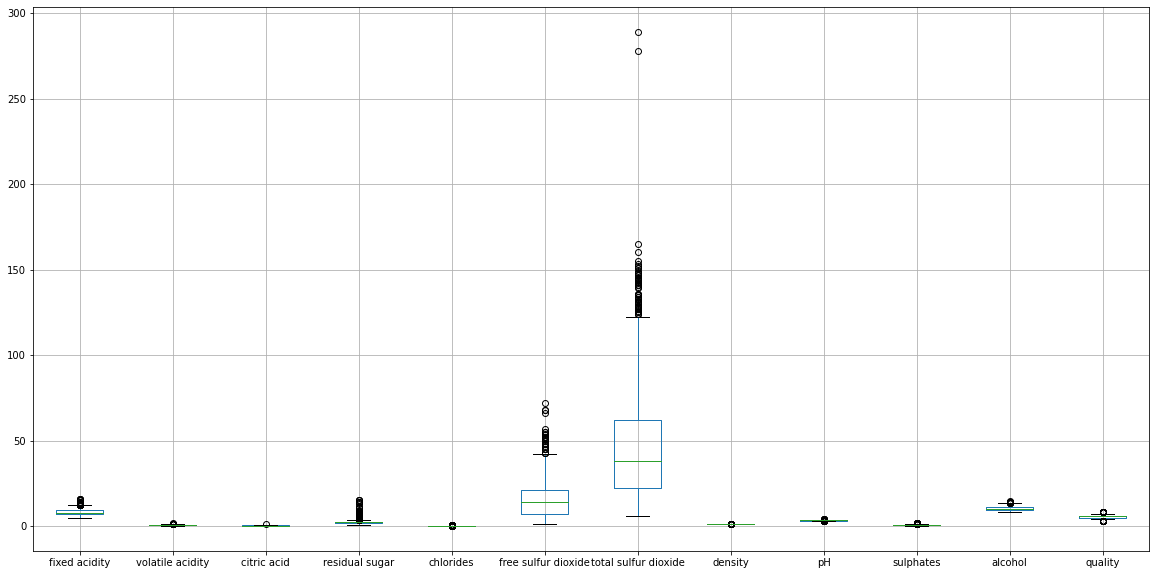

In [30]:
#Plotando um gráfico de boxplot das nossas variáveis
df.boxplot(figsize = (20,10))

In [31]:
#separando nosso dadaset em variáveis preditores e variável target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [41]:
#Normalizando nossos dados de entrada com os parâmetros default
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
array_scaler = scaler.fit_transform(X)
cols = X.columns

In [42]:
#Verificando como ficou nossos dados de entrada após aplicar a normalização em um dataframe
df_norm = pd.DataFrame(array_scaler, columns = cols)
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [43]:
#Encontrando o valor mínimo para a variável "fixed acidity"
df_norm['fixed acidity'].min()

0.0

In [44]:
#Dividindo nossos dados em treino e teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_norm,y,test_size = 0.3, random_state = 1)

**Construção do Modelo**
* KNN
* Decision Tree
* RandomForest
* SVM
* MLP

**KNN**

In [45]:
#Aplicando o algoritmo de KNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) #Utilizaremos 5 vizinhos mais próximos
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [46]:
#Verificando a acurácia do modelo
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test,y_pred)
print("Acurácia KNN: {}".format(acuracia))

Acurácia KNN: 0.5645833333333333


**DecisionTree**

In [57]:
#Aplicando o algoritmo de Árvores de Decisão
from sklearn.tree import DecisionTreeClassifier
clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(X_train,y_train)
y_arvore_pred = clf_arvore.predict(X_test)
acuracia_tree = accuracy_score(y_test,y_arvore_pred)

In [58]:
#Verificando a acurácia do algoritmo de árvores de decisão
print("Acurácia DecisionTree: {}".format(acuracia_tree))

Acurácia DecisionTree: 0.5895833333333333


**RandomForest**

In [59]:
#Aplicando o algoritmo RandomForest
from sklearn.ensemble import RandomForestClassifier
clf_floresta = RandomForestClassifier(max_depth = 10, random_state = 1)
clf_floresta.fit(X_train,y_train)
y_pred_floresta = clf_floresta.predict(X_test)
acuracia_floresta = accuracy_score(y_test,y_pred_floresta)

In [60]:
#Verificano a acurácia
print("Acurácia RandomFlorest: {}".format(acuracia_floresta))

Acurácia RandomFlorest: 0.6791666666666667


**SVM**

In [61]:
#Aplicando algoritmo SVM 
from sklearn.svm import SVC
clf_svm = SVC(gamma = 'auto', kernel = 'rbf')
clf_svm.fit(X_train,y_train)
y_pred_svm = clf_svm.predict(X_test)
acuracia_svm = accuracy_score(y_test,y_pred_svm)

In [62]:
#Verificando acurácia SVM
print("Acurácia SVM: {}".format(acuracia_svm))

Acurácia SVM: 0.5854166666666667


**MLP**

In [54]:
#Aplicando o MLP
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(alpha = 1e-5,hidden_layer_sizes = (5,5), random_state = 1)
clf_mlp.fit(X_train,y_train)
y_pred_mlp = clf_mlp.predict(X_test)
acuracia_mlp = accuracy_score(y_test,y_pred_mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [55]:
#Verificando a acurácia do MLP
print("Acurácia MLP: {}".format(acuracia_mlp))

Acurácia MLP: 0.6
